## Preprocessing

In [32]:
import pandas as pd

# step 1 - Eksplorasi Data
df = pd.read_csv('Predict Hair Fall.csv')
df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
995,164777,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,Yes,0
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [33]:
df.columns = df.columns.str.strip()
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss'],
      dtype='object')

In [34]:
no_data_count = df.eq("No Data").sum().reset_index()
no_data_count.columns = ["Kolom", "Jumlah_No_Data"]
print(no_data_count)


                       Kolom  Jumlah_No_Data
0                         Id               0
1                   Genetics               0
2           Hormonal Changes               0
3         Medical Conditions             110
4   Medications & Treatments               2
5   Nutritional Deficiencies              80
6                     Stress               0
7                        Age               0
8      Poor Hair Care Habits               0
9      Environmental Factors               0
10                   Smoking               0
11               Weight Loss               0
12                 Hair Loss               0


In [35]:
#step 3 - Drop data dengan "No Data" pada kolom Medical Conditions (target utama)
df = df[df["Medical Conditions"] != "No Data"].copy()


In [36]:
#step 4 - Handling No Data pada kolom Nutritional Deficiencies

# Mengubah No Data pada kolom lain menjadi "Unknown"
df = df.replace("No Data", "Unknown")


In [37]:
df_pair = df[["Medical Conditions", "Nutritional Deficiencies"]]
df_pair_unique = df_pair.drop_duplicates()
df_pair_unique.sort_values("Medical Conditions")



,Medical Conditions,Nutritional Deficiencies
70,Alopecia Areata,Unknown
36,Alopecia Areata,Biotin Deficiency
125,Alopecia Areata,Protein deficiency
54,Alopecia Areata,Iron deficiency
112,Alopecia Areata,Vitamin D Deficiency
...,...,...
185,Thyroid Problems,Iron deficiency
275,Thyroid Problems,Magnesium deficiency
188,Thyroid Problems,Vitamin D Deficiency
254,Thyroid Problems,Selenium deficiency


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        889 non-null    int64 
 1   Genetics                  889 non-null    object
 2   Hormonal Changes          889 non-null    object
 3   Medical Conditions        889 non-null    object
 4   Medications & Treatments  889 non-null    object
 5   Nutritional Deficiencies  889 non-null    object
 6   Stress                    889 non-null    object
 7   Age                       889 non-null    int64 
 8   Poor Hair Care Habits     889 non-null    object
 9   Environmental Factors     889 non-null    object
 10  Smoking                   889 non-null    object
 11  Weight Loss               889 non-null    object
 12  Hair Loss                 889 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 97.2+ KB


In [39]:

known = df[df["Nutritional Deficiencies"] != "Unknown"].copy()
unknown = df[df["Nutritional Deficiencies"] == "Unknown"].copy()


In [23]:
unknown

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
29,117296,No,Yes,Dermatitis,Chemotherapy,Unknown,Low,21,Yes,Yes,Yes,No,0
30,139857,No,No,Dermatosis,Chemotherapy,Unknown,High,22,Yes,Yes,No,No,0
37,164570,No,No,Eczema,Heart Medication,Unknown,Low,21,Yes,No,No,Yes,1
57,179680,Yes,Yes,Thyroid Problems,Antidepressants,Unknown,Low,21,Yes,No,No,Yes,1
66,124384,Yes,No,Dermatosis,Blood Pressure Medication,Unknown,Moderate,22,Yes,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,151447,No,No,Psoriasis,Antidepressants,Unknown,Low,22,No,No,No,Yes,0
966,139144,No,No,Alopecia Areata,Antifungal Cream,Unknown,High,23,No,Yes,Yes,Yes,0
976,163302,Yes,Yes,Psoriasis,Blood Pressure Medication,Unknown,Low,21,Yes,Yes,Yes,No,0
988,174574,No,No,Androgenetic Alopecia,Antibiotics,Unknown,High,23,Yes,Yes,No,Yes,0


In [24]:
known

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,181854,Yes,Yes,Dermatosis,Rogaine,Magnesium deficiency,Low,30,No,No,No,No,1
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [40]:
from sklearn.preprocessing import OrdinalEncoder

known_encoded = known.copy()
unknown_encoded = unknown.copy()

encoder = OrdinalEncoder()

# kolom kategorikal object kecuali target
cat_cols = [col for col in df.select_dtypes(include='object').columns
            if col != "Nutritional Deficiencies"]

# fit di data known, transform known + unknown
known_encoded[cat_cols] = encoder.fit_transform(known_encoded[cat_cols])
unknown_encoded[cat_cols] = encoder.transform(unknown_encoded[cat_cols])


In [41]:
from sklearn.preprocessing import LabelEncoder

target_le = LabelEncoder()
known_encoded["Nutritional Deficiencies"] = target_le.fit_transform(
    known_encoded["Nutritional Deficiencies"]
)


In [42]:
from sklearn.ensemble import RandomForestClassifier

X_train = known_encoded.drop(columns=["Nutritional Deficiencies"])
y_train = known_encoded["Nutritional Deficiencies"]

model = RandomForestClassifier(
    n_estimators=300,
    random_state=45
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=45)

In [43]:
# fitur pada data unknown
X_unknown = unknown_encoded.drop(columns=["Nutritional Deficiencies"])

# prediksi label numerik
y_pred_num = model.predict(X_unknown)

# konversi kembali ke label asli
y_pred_label = target_le.inverse_transform(y_pred_num)

# simpan ke dataframe unknown
unknown["Nutritional Deficiencies"] = y_pred_label


In [44]:
unknown

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
29,117296,No,Yes,Dermatitis,Chemotherapy,Zinc Deficiency,Low,21,Yes,Yes,Yes,No,0
30,139857,No,No,Dermatosis,Chemotherapy,Vitamin A Deficiency,High,22,Yes,Yes,No,No,0
37,164570,No,No,Eczema,Heart Medication,Omega-3 fatty acids,Low,21,Yes,No,No,Yes,1
57,179680,Yes,Yes,Thyroid Problems,Antidepressants,Iron deficiency,Low,21,Yes,No,No,Yes,1
66,124384,Yes,No,Dermatosis,Blood Pressure Medication,Vitamin A Deficiency,Moderate,22,Yes,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,151447,No,No,Psoriasis,Antidepressants,Vitamin A Deficiency,Low,22,No,No,No,Yes,0
966,139144,No,No,Alopecia Areata,Antifungal Cream,Zinc Deficiency,High,23,No,Yes,Yes,Yes,0
976,163302,Yes,Yes,Psoriasis,Blood Pressure Medication,Biotin Deficiency,Low,21,Yes,Yes,Yes,No,0
988,174574,No,No,Androgenetic Alopecia,Antibiotics,Vitamin A Deficiency,High,23,Yes,Yes,No,Yes,0


In [45]:
df_imputed = pd.concat([known, unknown]).sort_index()
df_imputed


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,196218,No,Yes,Scalp Infection,Immunomodulators,Vitamin A Deficiency,Moderate,23,Yes,Yes,Yes,Yes,0
994,184367,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,Yes,1
996,143273,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,Yes,1
997,169123,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,Yes,1


In [59]:
df_imputed.duplicated().sum()


0

In [60]:
df_imputed.isna().sum()


Id                          0
Genetics                    0
Hormonal Changes            0
Medical Conditions          0
Medications & Treatments    0
Nutritional Deficiencies    0
Stress                      0
Age                         0
Poor Hair Care Habits       0
Environmental Factors       0
Smoking                     0
Weight Loss                 0
Hair Loss                   0
dtype: int64

In [58]:
# Daftar unik penyakit / treatment
diseases = df_imputed['Age'].unique()
print(diseases)


[43 26 46 30 37 35 19 49 48 20 34 29 33 28 41 21 22 45 24 31 39 38 36 44
 27 25 23 50 32 18 47 42 40]


C:\Users\Liza\AppData\Local\Temp\ipykernel_21092\1472572064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


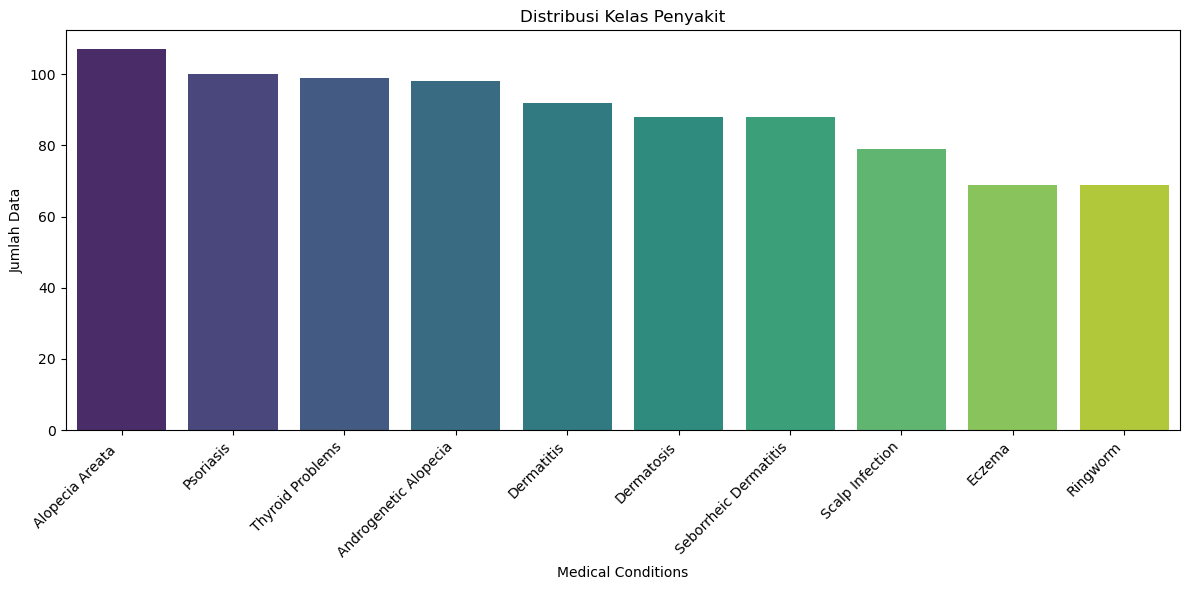

In [47]:
# step 5 - Visualisasi Distribusi Kelas pada Kolom Medical Conditions
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah tiap kelas
class_counts = df_imputed["Medical Conditions"].value_counts()

# Plot batang
plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Distribusi Kelas Penyakit")
plt.ylabel("Jumlah Data")
plt.xlabel("Medical Conditions")
plt.tight_layout()
plt.show()


C:\Users\Liza\AppData\Local\Temp\ipykernel_21092\3534197173.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


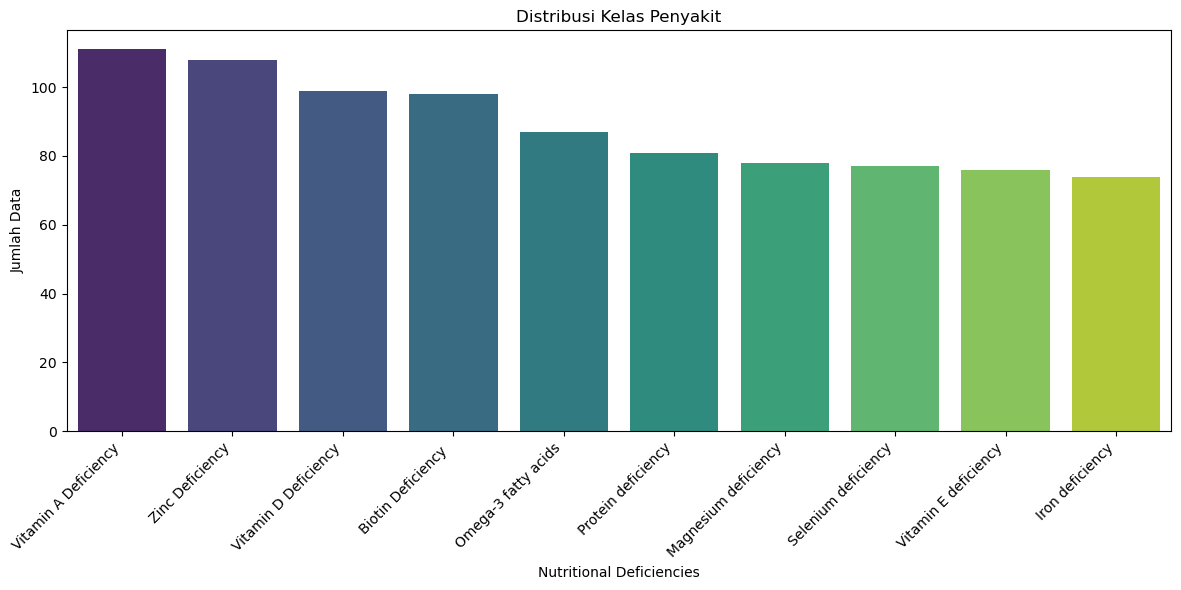

In [49]:
# step 5 - Visualisasi Distribusi Kelas pada Kolom Nutritional Deficiencies
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah tiap kelas
class_counts = df_imputed["Nutritional Deficiencies"].value_counts()

# Plot batang
plt.figure(figsize=(12,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Distribusi Kelas Penyakit")
plt.ylabel("Jumlah Data")
plt.xlabel("Nutritional Deficiencies")
plt.tight_layout()
plt.show()


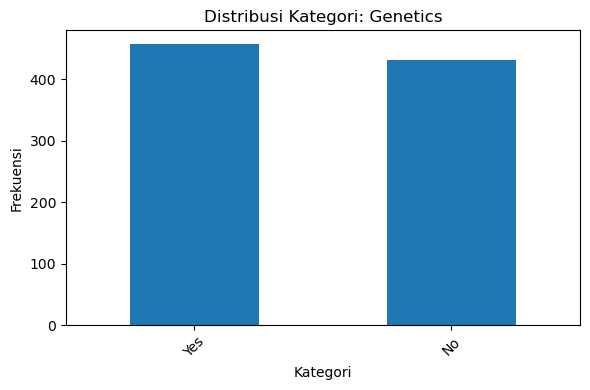

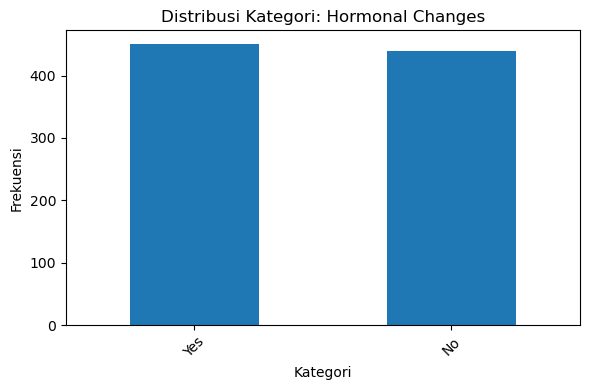

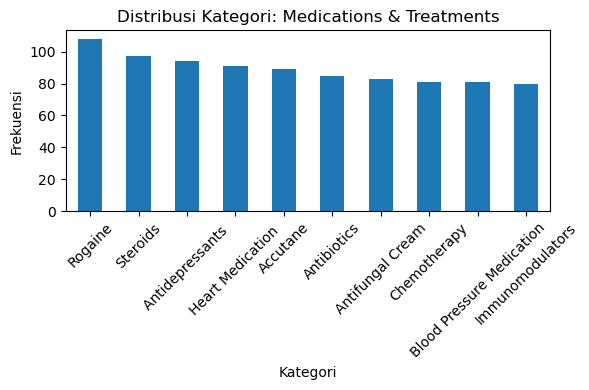

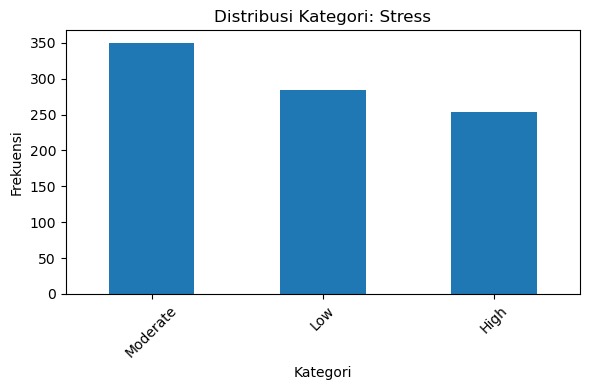

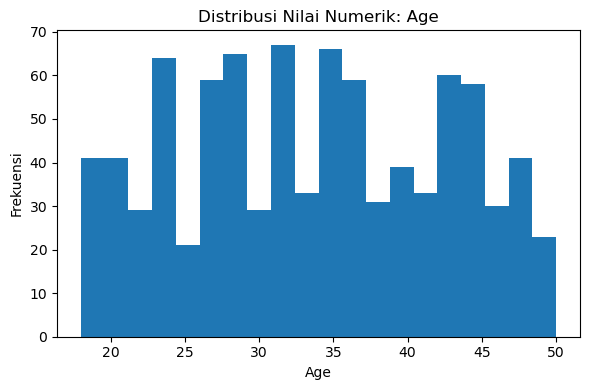

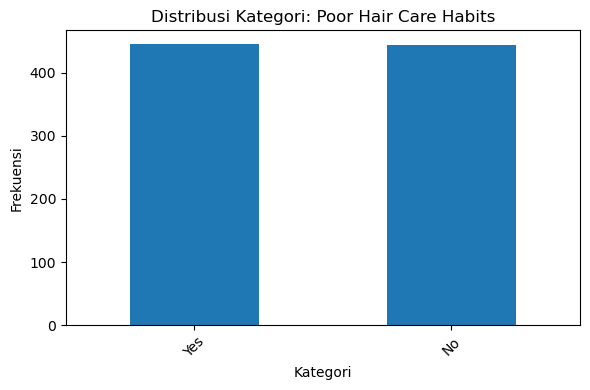

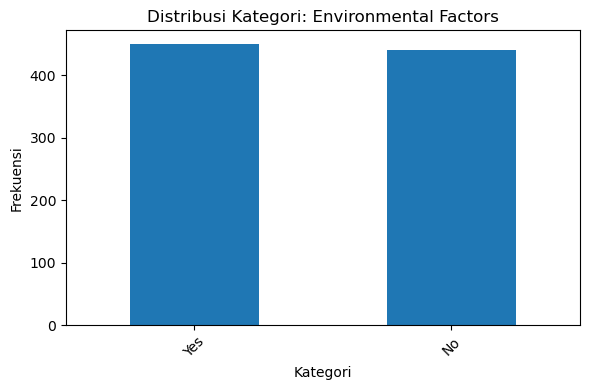

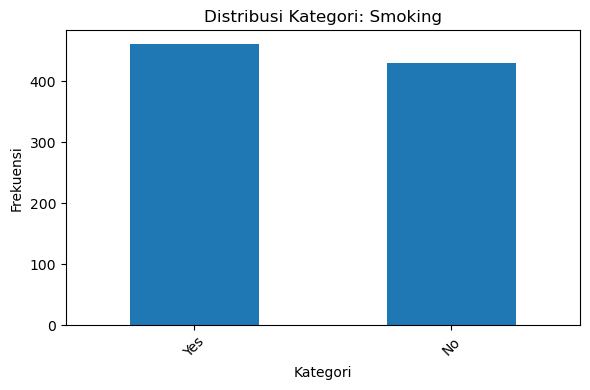

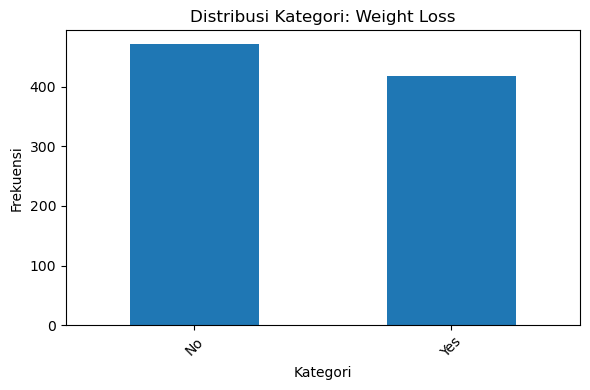

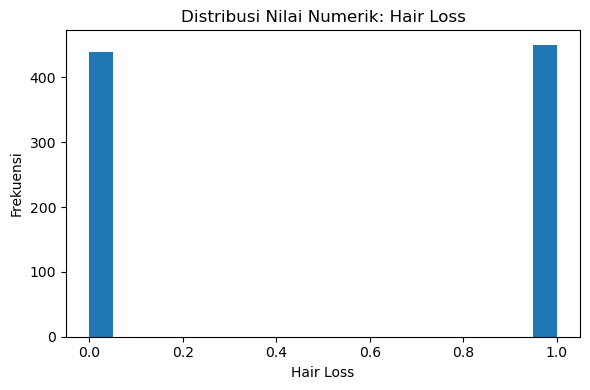

In [52]:
import matplotlib.pyplot as plt

# kolom yang ingin dikecualikan
exclude_cols = ["Nutritional Deficiencies", "Medical Conditions", "Id"]

# loop semua kolom
for col in df.columns:
    if col in exclude_cols:
        continue  # lewati kolom ini
    
    plt.figure(figsize=(6, 4))
    
    # jika kategorikal
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribusi Kategori: {col}")
        plt.xlabel("Kategori")
        plt.ylabel("Frekuensi")
        plt.xticks(rotation=45)
    
    # jika numerik
    else:
        plt.hist(df[col], bins=20)
        plt.title(f"Distribusi Nilai Numerik: {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
    
    plt.tight_layout()
    plt.show()


## Training

In [68]:
yes_no_cols = [
    "Genetics",
    "Hormonal Changes",
    "Poor Hair Care Habits",
    "Environmental Factors",
    "Smoking",
    "Weight Loss"
]
onehot_cols = [
    "Stress",
    "Medications & Treatments",
    "Nutritional Deficiencies"
]
numeric_cols = ["Age", "Hair Loss"]


In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Salin data
df_train = df_imputed.copy()

# Drop kolom ID
df_train = df_train.drop(columns=["Id"])

# Kolom Yes/No
yes_no_cols = [
    "Genetics", "Hormonal Changes", "Stress",
    "Poor Hair Care Habits", "Environmental Factors",
    "Smoking", "Weight Loss"
]

# One-Hot columns
onehot_cols = ["Medications & Treatments", "Nutritional Deficiencies"]

# Numerik
numeric_cols = ["Age", "Hair Loss"]

# 1) Label encode Yes/No
le_yesno = LabelEncoder()
for col in yes_no_cols:
    df_train[col] = le_yesno.fit_transform(df_train[col])

# 2) Label encode target
target_le = LabelEncoder()
df_train["Medical Conditions"] = target_le.fit_transform(df_train["Medical Conditions"])

# 3) Define preprocessor (OneHot untuk kategori non-biner)
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
    ],
    remainder="passthrough"   # sisanya: yes/no (sudah numeric) + numeric
)

# 4) Pipeline RF
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestClassifier(random_state=42))
])

# 5) Split data
X = df_train.drop(columns=["Medical Conditions"])
y = df_train["Medical Conditions"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Train
model.fit(X_train, y_train)


c:\Users\Liza\anaconda3\envs\KPLiza\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Medications & Treatments',
                                                   'Nutritional '
                                                   'Deficiencies'])])),
                ('rf', RandomForestClassifier(random_state=42))])

Accuracy: 0.10674157303370786

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.10      0.09        21
           1       0.06      0.05      0.06        20
           2       0.20      0.22      0.21        18
           3       0.14      0.17      0.15        18
           4       0.33      0.21      0.26        14
           5       0.07      0.10      0.09        20
           6       0.11      0.07      0.09        14
           7       0.08      0.06      0.07        16
           8       0.05      0.06      0.05        17
           9       0.06      0.05      0.05        20

    accuracy                           0.11       178
   macro avg       0.12      0.11      0.11       178
weighted avg       0.11      0.11      0.11       178



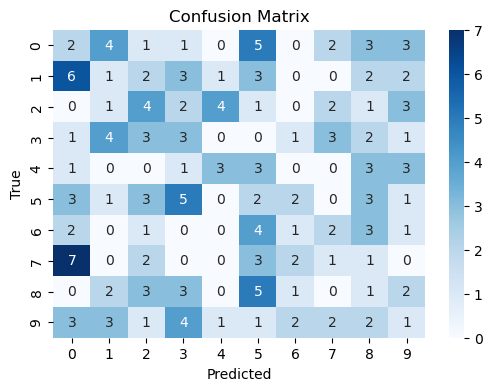

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada test set
y_pred = model.predict(X_test)

# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [66]:
df_encoded = df_train.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.corr()["Medical Conditions"].sort_values()


Stress                     -0.050992
Hair Loss                  -0.046064
Hormonal Changes           -0.036252
Genetics                   -0.005747
Smoking                    -0.004319
Poor Hair Care Habits       0.002125
Weight Loss                 0.011173
Nutritional Deficiencies    0.019116
Medications & Treatments    0.022849
Age                         0.046125
Environmental Factors       0.069695
Medical Conditions          1.000000
Name: Medical Conditions, dtype: float64

In [67]:
print(df_imputed.head())
print(df_imputed.info())
print(df_imputed.corr(numeric_only=True))
print(df_imputed["Medical Conditions"].value_counts())


       Id Genetics Hormonal Changes Medical Conditions  \
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   
5  139661      Yes               No          Psoriasis   

  Medications & Treatments Nutritional Deficiencies    Stress  Age  \
1              Antibiotics     Magnesium deficiency      High   43   
2         Antifungal Cream       Protein deficiency  Moderate   26   
3              Antibiotics       Biotin Deficiency   Moderate   46   
4                 Accutane          Iron deficiency  Moderate   30   
5              Antibiotics     Magnesium deficiency       Low   37   

  Poor Hair Care Habits Environmental Factors Smoking Weight Loss  Hair Loss  
1                   Yes                   Yes      No          No          0  
2                   Yes                   Yes      No         Yes       

In [76]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Copy dataset
df = df_imputed.copy()

# Pisahkan X dan y
X = df.drop(columns=['Medical Conditions', 'Id'])
y = df['Medical Conditions']


In [79]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tentukan fitur kategorikal
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Model CatBoost
model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    l2_leaf_reg=5,
    early_stopping_rounds=50
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=50
)

# Evaluasi - HARUS pakai X_test
preds = model.predict(X_test)


0:	learn: 0.1476793	test: 0.1011236	best: 0.1011236 (0)	total: 59.9ms	remaining: 17.9s
50:	learn: 0.4669480	test: 0.1292135	best: 0.1629213 (4)	total: 3.1s	remaining: 15.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1629213483
bestIteration = 4

Shrink model to first 5 iterations.


In [ ]:

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))